#### Se importan las librerias necesarias

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

from matplotlib.colors import ListedColormap
from PIL import Image
from wordcloud import WordCloud

#### Se carga la información del csv principal a un dataframe.

In [2]:
tweets = pd.read_csv('../TP1-Organizacion-de-Datos/csv/train.csv')
tweets.sample(n=5)

,id,keyword,location,text,target
7286,10427,whirlwind,Manchester,In @edfringe? We highly recommend @M00NF00L #T...,0
6887,9873,traumatised,NaN,...the kids at the orphanage were obviously no...,0
6991,10027,twister,NaN,Reasons brain twister oneself should discount ...,0
6592,9439,survivors,Numenor,Haley Lu Richardson Fights for Water in The La...,0
4568,6494,injuries,Scottsdale. AZ,Next Man Up---AH SCREW THIS! I'm so tired of i...,0


##### Se reemplaza la columna 'target' por 'about_disaster' para mayor comodidad y se agregan 'char_length' y 'word_length'

In [3]:
tweets_final = tweets.rename(columns={'target':'about_disaster'})
tweets_final['about_disaster'] = ((tweets_final['about_disaster'])==1)
tweets_final['char_length'] = (tweets_final['text']).str.len()
tweets_final['keyword'] = tweets_final['keyword'].str.replace('%20', '_')
tweets_final.head()

,id,keyword,location,text,about_disaster,char_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88


In [4]:
palabras = tweets_final['text'].str.split()
aux = []
for i in palabras:
    aux.append(len(i))

tweets_final['word_length'] = aux
tweets_final.head()

,id,keyword,location,text,about_disaster,char_length,word_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88,16


# Veracidad por keyword

In [5]:
tweets_final['keyword'].fillna("none_keyword", inplace=True)

#### Se agrupa por keyword y se calcula valores relevantes a lo que se busca estudiar (cantidad de tweets veraces y totales, y longitud promedio de los tweets totales, veraces y no veraces por keyword).

In [6]:
tweets_por_keyword = tweets_final.groupby(['keyword'])\
                    .agg({'about_disaster':['sum','count'],'char_length':['mean'], 'word_length':['mean']})
    
tweets_por_keyword.head()

about_disaster       char_length word_length
                             sum count        mean        mean
keyword                                                       
ablaze                      13.0    36   94.694444   13.916667
accident                    24.0    35  100.085714   15.257143
aftershock                   0.0    34  101.205882   14.911765
airplane_accident           30.0    35  106.400000   15.314286
ambulance                   20.0    38   98.394737   12.815789

In [7]:
tweets_por_keyword.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, ablaze to wrecked
Data columns (total 4 columns):
(about_disaster, sum)      222 non-null float64
(about_disaster, count)    222 non-null int64
(char_length, mean)        222 non-null float64
(word_length, mean)        222 non-null float64
dtypes: float64(3), int64(1)
memory usage: 8.7+ KB


#### Se elimina el MultiIndex

In [8]:
nivel0 = tweets_por_keyword.columns.get_level_values(0)
nivel1 = tweets_por_keyword.columns.get_level_values(1)
tweets_por_keyword.columns = nivel0 + '_' + nivel1
tweets_por_keyword.head()

,about_disaster_sum,about_disaster_count,char_length_mean,word_length_mean
keyword,,,,
ablaze,13.0,36,94.694444,13.916667
accident,24.0,35,100.085714,15.257143
aftershock,0.0,34,101.205882,14.911765
airplane_accident,30.0,35,106.400000,15.314286
ambulance,20.0,38,98.394737,12.815789


#### Se renombran y reordenan las columnas para mayor claridad

In [9]:
nuevos_nombres = {'about_disaster_sum':'about_disaster_true', 'about_disaster_count':'count'}
tweets_por_keyword.rename(columns=nuevos_nombres, inplace=True)
tweets_por_keyword.head()

,about_disaster_true,count,char_length_mean,word_length_mean
keyword,,,,
ablaze,13.0,36,94.694444,13.916667
accident,24.0,35,100.085714,15.257143
aftershock,0.0,34,101.205882,14.911765
airplane_accident,30.0,35,106.400000,15.314286
ambulance,20.0,38,98.394737,12.815789


In [10]:
tweets_por_keyword['about_disaster_false'] = tweets_por_keyword['count'] - tweets_por_keyword['about_disaster_true']
tweets_por_keyword['veracity'] =  tweets_por_keyword['about_disaster_true']/tweets_por_keyword['count']
tweets_por_keyword = tweets_por_keyword[['about_disaster_true', 'about_disaster_false', 'count', 'veracity', 'char_length_mean', 'word_length_mean']]
tweets_por_keyword.sort_values(by='veracity', ascending=False, inplace=True)
tweets_por_keyword.head(10)

,about_disaster_true,about_disaster_false,count,veracity,char_length_mean,word_length_mean
keyword,,,,,,
wreckage,39.0,0.0,39,1.000000,122.256410,16.000000
derailment,39.0,0.0,39,1.000000,109.794872,15.282051
debris,37.0,0.0,37,1.000000,107.594595,14.891892
outbreak,39.0,1.0,40,0.975000,128.925000,17.550000
typhoon,37.0,1.0,38,0.973684,111.394737,13.473684
oil_spill,37.0,1.0,38,0.973684,102.973684,13.789474
suicide_bombing,32.0,1.0,33,0.969697,108.575758,15.757576
suicide_bomber,30.0,1.0,31,0.967742,109.032258,15.000000
bombing,27.0,2.0,29,0.931034,102.482759,13.655172


#### Se observa el promedio de tweets por keyword para filtrar aquellas que obstruyan el análisis estadístico

In [11]:
tweets_por_keyword['count'].mean()

34.292792792792795

In [12]:
tweets_por_keyword[tweets_por_keyword['count']<34].count()

about_disaster_true     77
about_disaster_false    77
count                   77
veracity                77
char_length_mean        77
word_length_mean        77
dtype: int64

#### Al enfocar el análisis estadístico a aquellas keywords que posean 34 o más tweets, se dejan de lado 77 keywords (alrededor del 35% del total).

In [13]:
tweets_por_keyword['count'].value_counts()

35    31
34    30
33    26
36    20
37    19
38    16
32    15
39    14
31     9
29     8
40     7
30     6
41     4
42     2
28     2
27     2
22     1
10     1
11     1
12     1
19     1
61     1
24     1
25     1
26     1
45     1
9      1
Name: count, dtype: int64

In [14]:
tweets_por_keyword[tweets_por_keyword['count']<29].count()

about_disaster_true     13
about_disaster_false    13
count                   13
veracity                13
char_length_mean        13
word_length_mean        13
dtype: int64

#### Al enfocarse en aquellas que tienen 29 o más tweets, el espectro estudiado aumenta claramente. Además, en este caso, 29 no es una diferencia significativa del promedio.

In [15]:
keywords_representables = (tweets_por_keyword[tweets_por_keyword['count']>=29])
keywords_veraces = keywords_representables.head(20)
keywords_no_veraces = keywords_representables.tail(20)

#### Se procede a graficar

Text(0.5, 1.0, 'Top 20 Keywords con mejor porcentaje de veracidad')

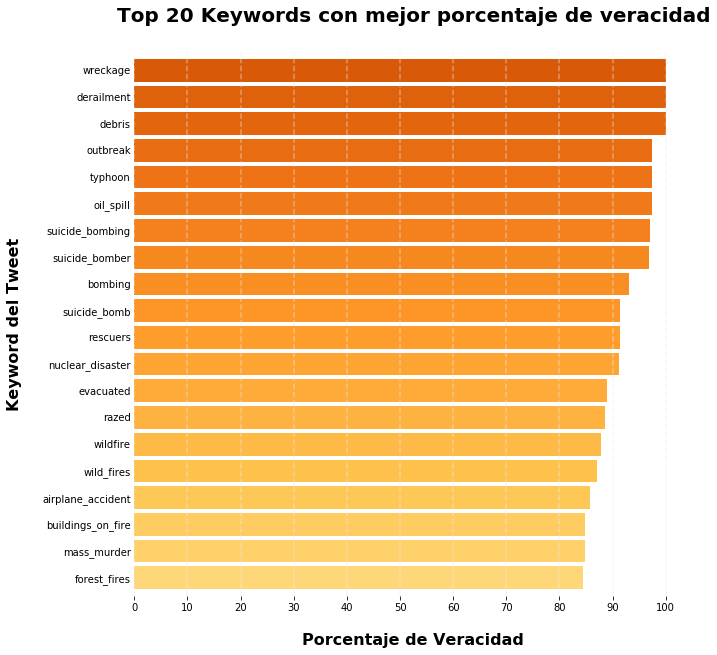

In [16]:
cmap = cm.get_cmap('YlOrBr')
saltos = np.linspace(0.3, 0.7, 20)
colores = cmap(saltos)
top20 = (keywords_veraces['veracity']*100).sort_values().plot(kind='barh', figsize=(10,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 100+1, 10.0))
plt.tick_params(axis='y', length=0)

top20.spines['right'].set_visible(False)
top20.spines['top'].set_visible(False)
top20.spines['left'].set_visible(False)
top20.spines['bottom'].set_visible(False)

lineas = top20.get_xticks()
for i in lineas:
      top20.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
top20.set_xlabel("Porcentaje de Veracidad", labelpad=20, weight='bold', size=16)
top20.set_ylabel("Keyword del Tweet", labelpad=20, weight='bold', size=16)

plt.title("Top 20 Keywords con mejor porcentaje de veracidad", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Top 20 Keywords con peor porcentaje de veracidad')

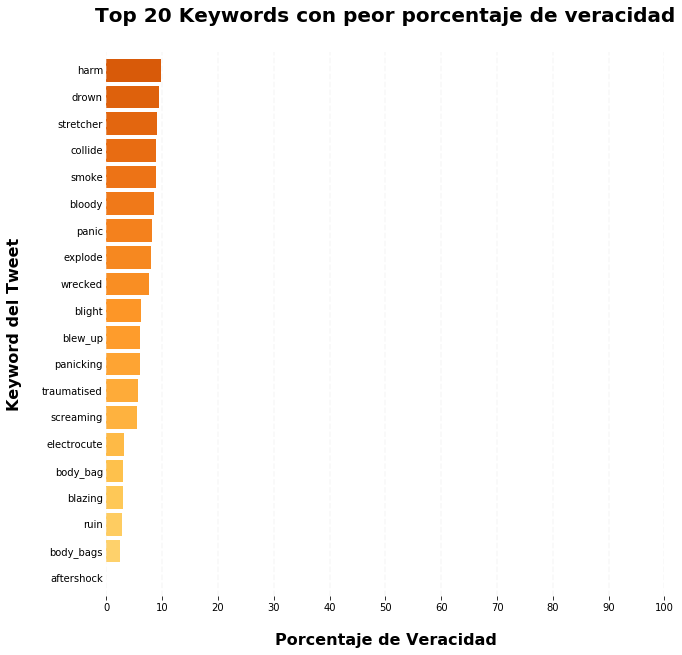

In [17]:
worst20 = (keywords_no_veraces['veracity']*100).sort_values().plot(kind='barh', figsize=(10,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 100+1, 10.0))
plt.tick_params(axis='y', length=0)

worst20.spines['right'].set_visible(False)
worst20.spines['top'].set_visible(False)
worst20.spines['left'].set_visible(False)
worst20.spines['bottom'].set_visible(False)

lineas = worst20.get_xticks()
for i in lineas:
      worst20.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
worst20.set_xlabel("Porcentaje de Veracidad", labelpad=20, weight='bold', size=16)
worst20.set_ylabel("Keyword del Tweet", labelpad=20, weight='bold', size=16)

plt.title("Top 20 Keywords con peor porcentaje de veracidad", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Cantidad de Keywords por porcentaje de veracidad')

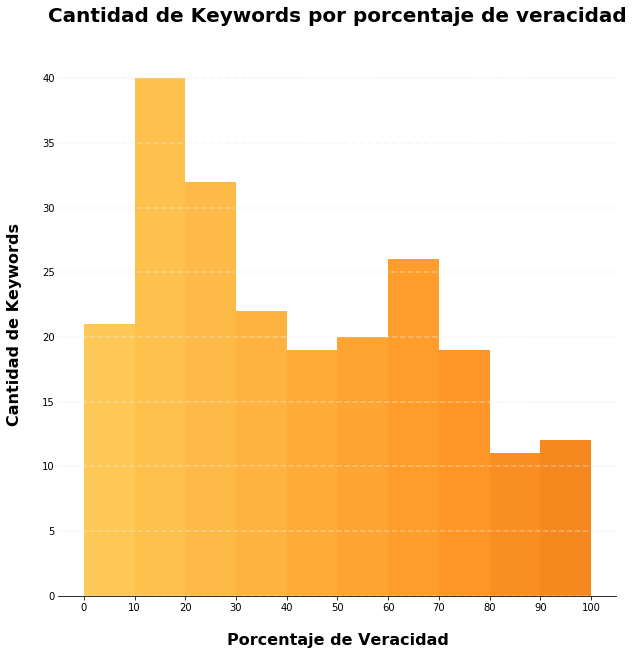

In [18]:
plt.figure(figsize=(10,10))    
n, bins, patches = plt.hist(tweets_por_keyword["veracity"]*100, bins=10, color="c")
hist_porcentajes = plt.gca()

for i,p in enumerate(patches):
    plt.setp(p, "facecolor", colores[i+3])

plt.xticks(np.arange(0, 100+1, 10.0))
plt.yticks(np.arange(0, 40+1, 5.0))
plt.tick_params(axis='y', length=0)

hist_porcentajes.spines['right'].set_visible(False)
hist_porcentajes.spines['top'].set_visible(False)
hist_porcentajes.spines['left'].set_visible(False)

lineas = hist_porcentajes.get_yticks()
for i in lineas:
      hist_porcentajes.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
hist_porcentajes.set_xlabel("Porcentaje de Veracidad", labelpad=20, weight='bold', size=16)
hist_porcentajes.set_ylabel("Cantidad de Keywords", labelpad=20, weight='bold', size=16)

plt.title("Cantidad de Keywords por porcentaje de veracidad", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Longitud promedio de los tweets con las 20 keywords más veraces')

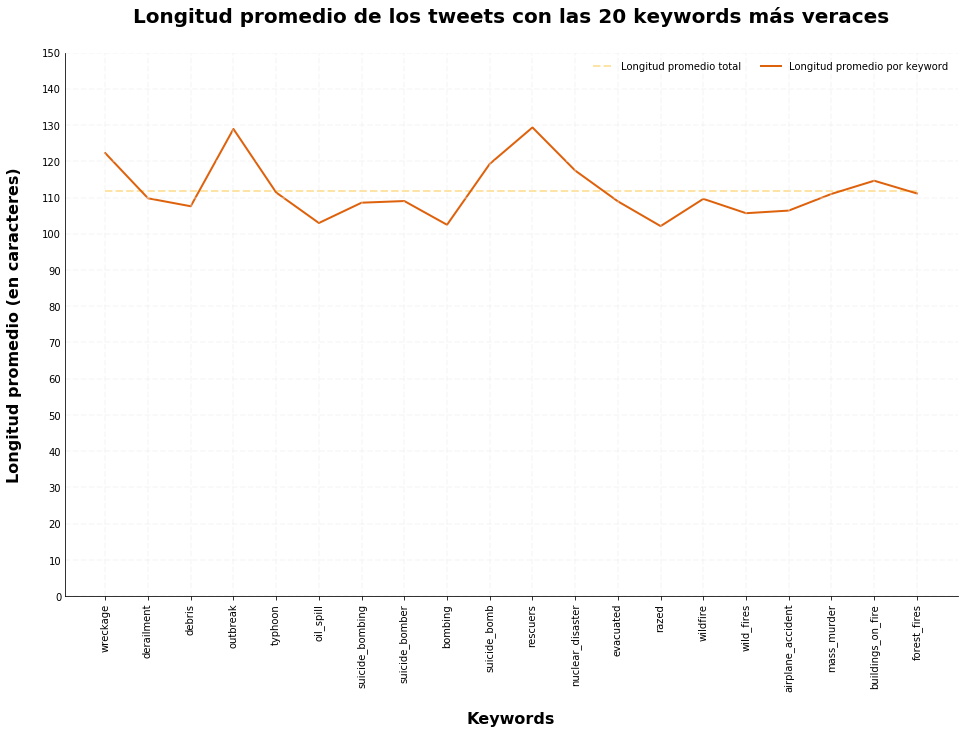

In [19]:
plt.figure(figsize=(16,10)) 
top20_linear = plt.subplot()

saltos_x = np.arange(0, 20, 1.0)
longitud_promedio = [keywords_veraces['char_length_mean'].mean()]*len(saltos_x)
top20_linear.plot(saltos_x, longitud_promedio, lw=2, color=colores[1], \
                  alpha=0.6, linestyle = '--', label='Longitud promedio total')

top20_linear.plot(keywords_veraces.index.values.tolist(), keywords_veraces['char_length_mean'],\
                lw=2, color=colores[18], alpha=1, label='Longitud promedio por keyword')

plt.xticks(saltos_x)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 160, 10.0))

top20_linear.spines['right'].set_visible(False)
top20_linear.spines['top'].set_visible(False)
plt.tick_params(axis='y', length=0)

lineas_x = top20_linear.get_xticks()
for i in lineas_x:
      top20_linear.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
lineas_y = top20_linear.get_yticks()
for i in lineas_y:
      top20_linear.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
        
        
top20_linear.set_xlabel("Keywords", labelpad=20, weight='bold', size=16)
top20_linear.set_ylabel("Longitud promedio (en caracteres)", labelpad=20, weight='bold', size=16)

top20_linear.legend(frameon=False, loc='best', ncol=2)

plt.title("Longitud promedio de los tweets con las 20 keywords más veraces", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Longitud promedio de los tweets con las 20 keywords menos veraces')

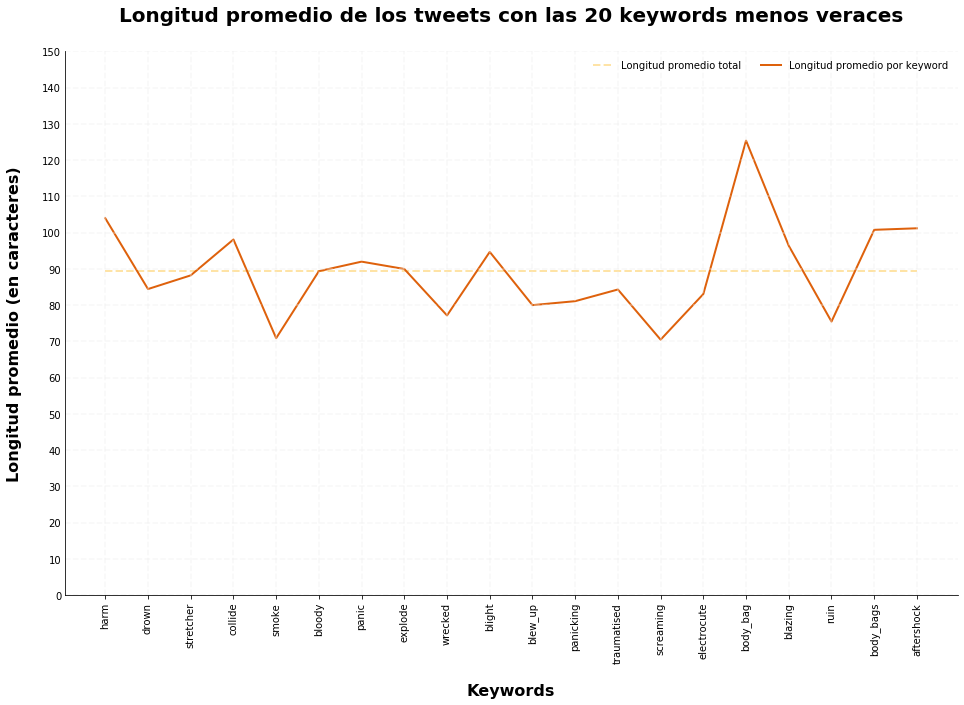

In [20]:
plt.figure(figsize=(16,10)) 
worst20 = plt.subplot()

saltos_x = np.arange(0, 20, 1.0)
longitud_promedio = [keywords_no_veraces['char_length_mean'].mean()]*len(saltos_x)
worst20.plot(saltos_x, longitud_promedio, lw=2, color=colores[1], \
                  alpha=0.6, linestyle = '--', label='Longitud promedio total')

worst20.plot(keywords_no_veraces.index.values.tolist(), keywords_no_veraces['char_length_mean'],\
                lw=2, color=colores[18], alpha=1, label='Longitud promedio por keyword')


plt.xticks(saltos_x)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 160, 10.0))

worst20.spines['right'].set_visible(False)
worst20.spines['top'].set_visible(False)
plt.tick_params(axis='y', length=0)

lineas_x = worst20.get_xticks()
for i in lineas_x:
      worst20.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
lineas_y = worst20.get_yticks()
for i in lineas_y:
      worst20.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
worst20.set_xlabel("Keywords", labelpad=20, weight='bold', size=16)
worst20.set_ylabel("Longitud promedio (en caracteres)", labelpad=20, weight='bold', size=16)

worst20.legend(frameon=False, loc='best', ncol=2)

plt.title("Longitud promedio de los tweets con las 20 keywords menos veraces", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Longitud promedio de los tweets con las 20 keywords más veraces')

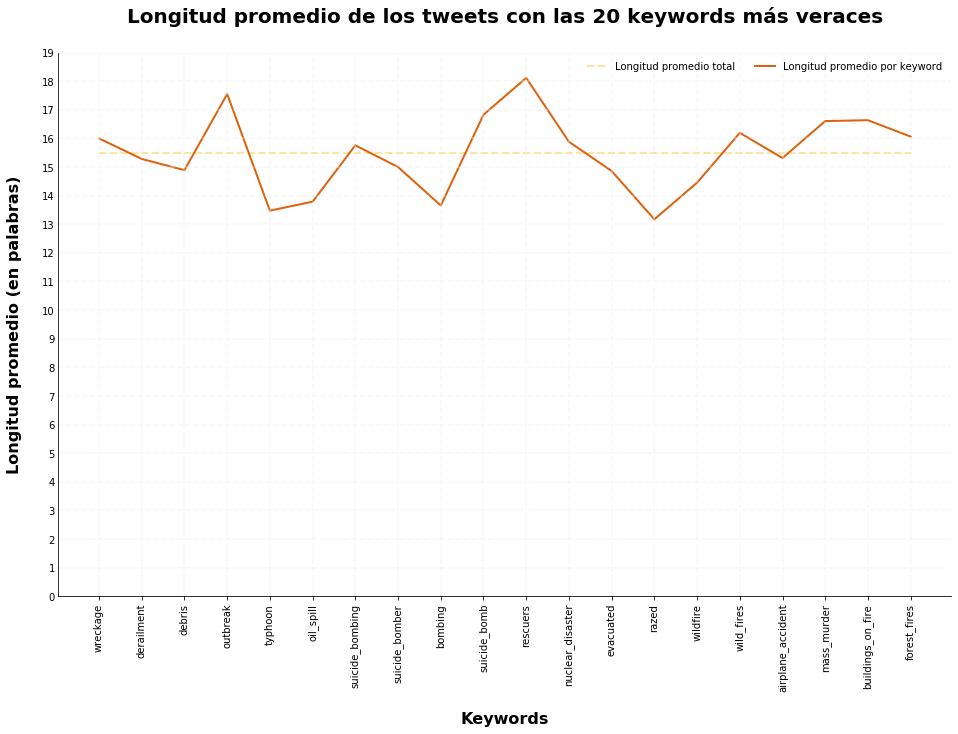

In [21]:
plt.figure(figsize=(16,10)) 
top20_linear = plt.subplot()

saltos_x = np.arange(0, 20, 1.0)
longitud_promedio = [keywords_veraces['word_length_mean'].mean()]*len(saltos_x)
top20_linear.plot(saltos_x, longitud_promedio, lw=2, color=colores[1], \
                  alpha=0.6, linestyle = '--', label='Longitud promedio total')

top20_linear.plot(keywords_veraces.index.values.tolist(), keywords_veraces['word_length_mean'],\
                lw=2, color=colores[18], alpha=1, label='Longitud promedio por keyword')

plt.xticks(saltos_x)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 20, 1.0))

top20_linear.spines['right'].set_visible(False)
top20_linear.spines['top'].set_visible(False)
plt.tick_params(axis='y', length=0)

lineas_x = top20_linear.get_xticks()
for i in lineas_x:
      top20_linear.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
lineas_y = top20_linear.get_yticks()
for i in lineas_y:
      top20_linear.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
        
        
top20_linear.set_xlabel("Keywords", labelpad=20, weight='bold', size=16)
top20_linear.set_ylabel("Longitud promedio (en palabras)", labelpad=20, weight='bold', size=16)

top20_linear.legend(frameon=False, loc='best', ncol=2)

plt.title("Longitud promedio de los tweets con las 20 keywords más veraces", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Longitud promedio de los tweets con las 20 keywords menos veraces')

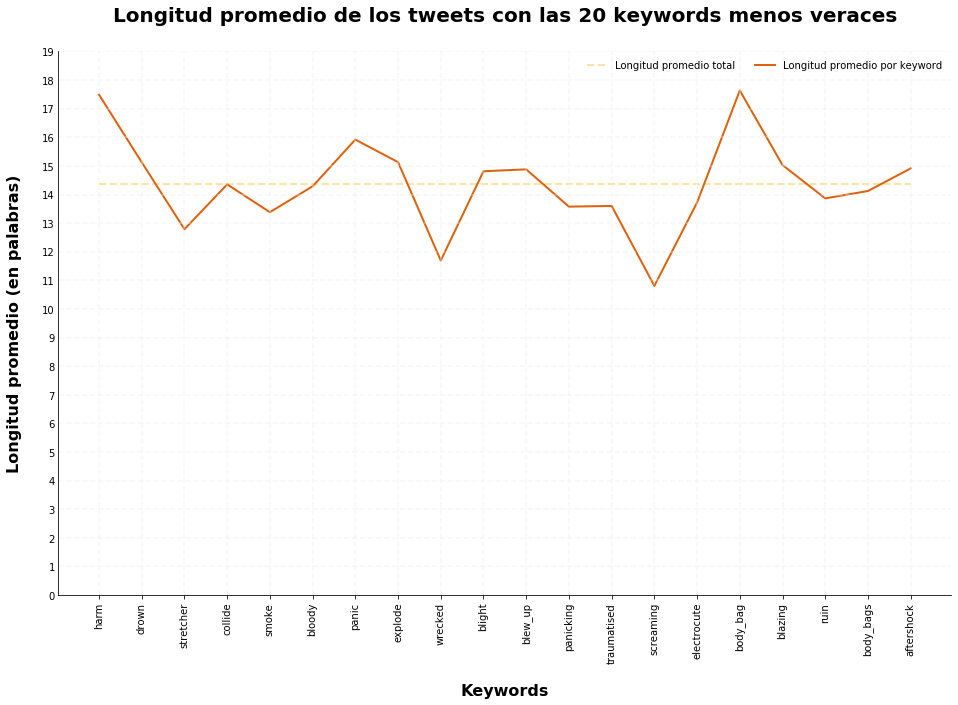

In [22]:
plt.figure(figsize=(16,10)) 
worst20 = plt.subplot()

saltos_x = np.arange(0, 20, 1.0)
longitud_promedio = [keywords_no_veraces['word_length_mean'].mean()]*len(saltos_x)
worst20.plot(saltos_x, longitud_promedio, lw=2, color=colores[1], \
                  alpha=0.6, linestyle = '--', label='Longitud promedio total')

worst20.plot(keywords_no_veraces.index.values.tolist(), keywords_no_veraces['word_length_mean'],\
                lw=2, color=colores[18], alpha=1, label='Longitud promedio por keyword')


plt.xticks(saltos_x)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 20, 1.0))

worst20.spines['right'].set_visible(False)
worst20.spines['top'].set_visible(False)
plt.tick_params(axis='y', length=0)

lineas_x = worst20.get_xticks()
for i in lineas_x:
      worst20.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
lineas_y = worst20.get_yticks()
for i in lineas_y:
      worst20.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
worst20.set_xlabel("Keywords", labelpad=20, weight='bold', size=16)
worst20.set_ylabel("Longitud promedio (en palabras)", labelpad=20, weight='bold', size=16)

worst20.legend(frameon=False, loc='best', ncol=2)

plt.title("Longitud promedio de los tweets con las 20 keywords menos veraces", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Top 20 Keywords con mayor longitud de tweets (en caracteres)')

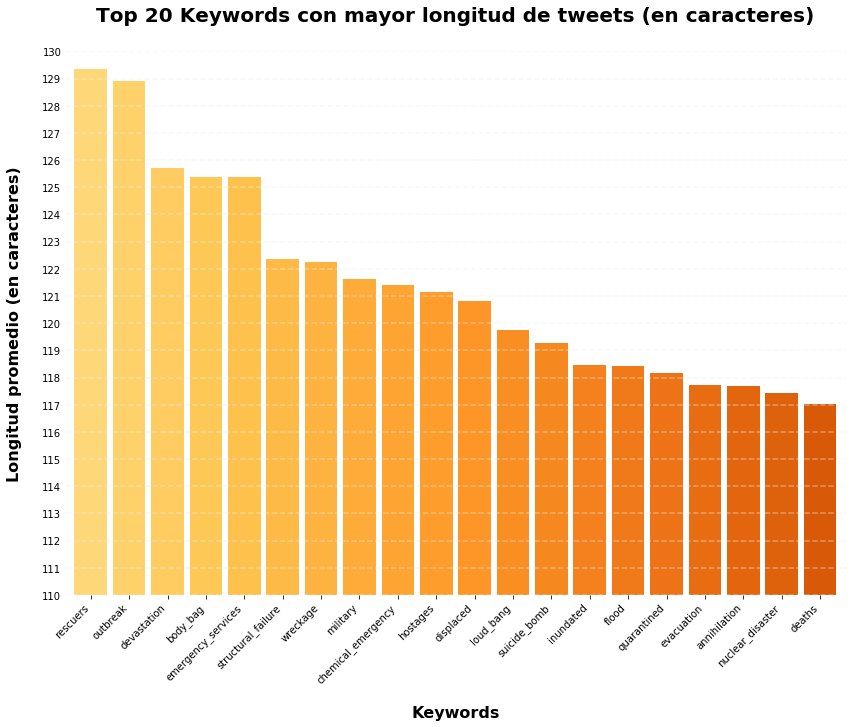

In [23]:
top20largas_c = (keywords_representables['char_length_mean']).sort_values(ascending=False).head(20)\
                .plot(kind='bar', figsize=(14,10), color=colores, width=0.85)

plt.xticks(rotation=45, ha='right')    
plt.yticks(np.arange(110, 135, 1.0))
plt.tick_params(axis='y', length=0)
plt.ylim(110, 130)

top20largas_c.spines['right'].set_visible(False)
top20largas_c.spines['top'].set_visible(False)
top20largas_c.spines['left'].set_visible(False)
top20largas_c.spines['bottom'].set_visible(False)

lineas = top20largas_c.get_yticks()
for i in lineas:
      top20largas_c.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
top20largas_c.set_xlabel("Keywords", labelpad=20, weight='bold', size=16)
top20largas_c.set_ylabel("Longitud promedio (en caracteres)", labelpad=20, weight='bold', size=16)

plt.title("Top 20 Keywords con mayor longitud de tweets (en caracteres)", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Top 20 Keywords con menor longitud de tweets (en caracteres)')

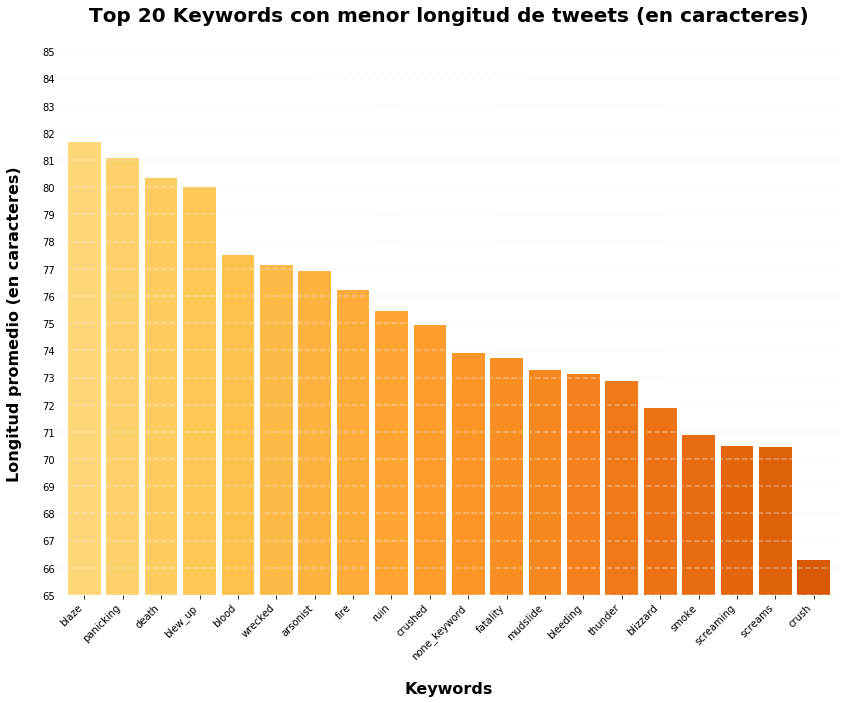

In [24]:
top20cortas_c = (keywords_representables['char_length_mean']).sort_values(ascending=False).tail(20)\
                .plot(kind='bar', figsize=(14,10), color=colores, width=0.85)

plt.xticks(rotation=45, ha='right')    
plt.yticks(np.arange(65, 90, 1.0))
plt.tick_params(axis='y', length=0)
plt.ylim(65, 85)

top20cortas_c.spines['right'].set_visible(False)
top20cortas_c.spines['top'].set_visible(False)
top20cortas_c.spines['left'].set_visible(False)
top20cortas_c.spines['bottom'].set_visible(False)

lineas = top20cortas_c.get_yticks()
for i in lineas:
      top20cortas_c.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
top20cortas_c.set_xlabel("Keywords", labelpad=20, weight='bold', size=16)
top20cortas_c.set_ylabel("Longitud promedio (en caracteres)", labelpad=20, weight='bold', size=16)

plt.title("Top 20 Keywords con menor longitud de tweets (en caracteres)", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Top 20 Keywords con mayor longitud de tweets (en palabras)')

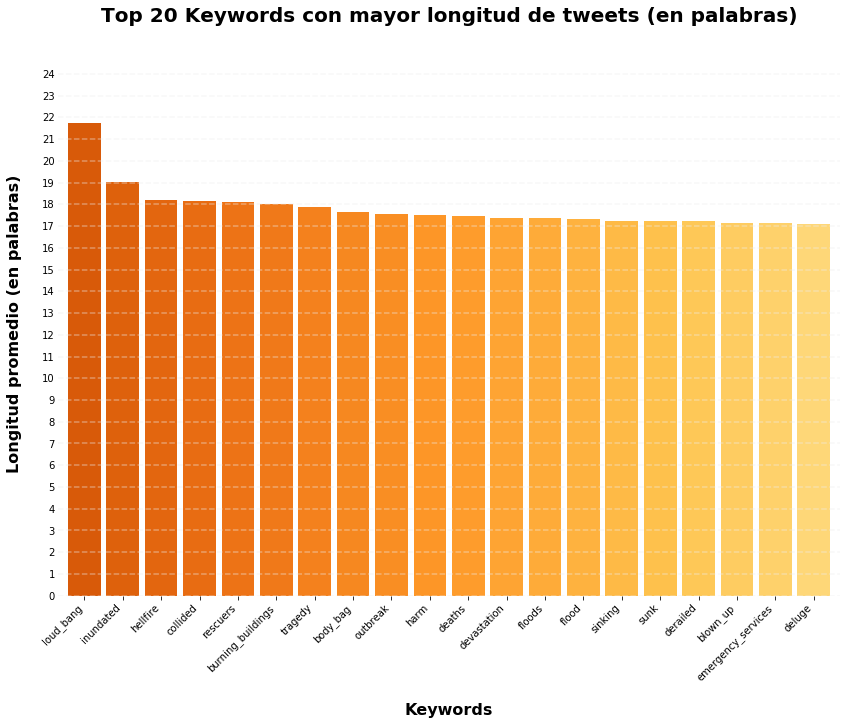

In [25]:
top20largas_w = (keywords_representables['word_length_mean']).sort_values(ascending=False).head(20)\
                .plot(kind='bar', figsize=(14,10), color=colores[::-1], width=0.85)

plt.xticks(rotation=45, ha='right')    
plt.yticks(np.arange(0, 25, 1.0))
plt.tick_params(axis='y', length=0)
plt.ylim(0, 25)

top20largas_w.spines['right'].set_visible(False)
top20largas_w.spines['top'].set_visible(False)
top20largas_w.spines['left'].set_visible(False)
top20largas_w.spines['bottom'].set_visible(False)

lineas = top20largas_w.get_yticks()
for i in lineas:
      top20largas_w.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
top20largas_w.set_xlabel("Keywords", labelpad=20, weight='bold', size=16)
top20largas_w.set_ylabel("Longitud promedio (en palabras)", labelpad=20, weight='bold', size=16)

plt.title("Top 20 Keywords con mayor longitud de tweets (en palabras)", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Top 20 Keywords con menor longitud de tweets (en palabras)')

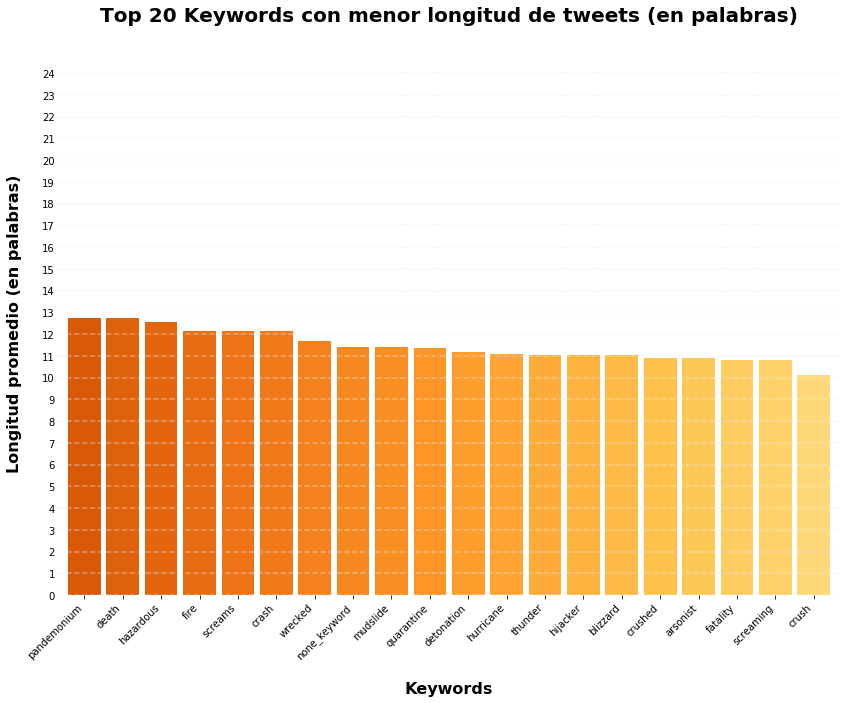

In [26]:
top20cortas_w = (keywords_representables['word_length_mean']).sort_values(ascending=False).tail(20)\
                .plot(kind='bar', figsize=(14,10), color=colores[::-1], width=0.85)

plt.xticks(rotation=45, ha='right')    
plt.yticks(np.arange(0, 25, 1.0))
plt.tick_params(axis='y', length=0)
plt.ylim(0, 25)

top20cortas_w.spines['right'].set_visible(False)
top20cortas_w.spines['top'].set_visible(False)
top20cortas_w.spines['left'].set_visible(False)
top20cortas_w.spines['bottom'].set_visible(False)

lineas = top20cortas_w.get_yticks()
for i in lineas:
      top20cortas_w.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
top20cortas_w.set_xlabel("Keywords", labelpad=20, weight='bold', size=16)
top20cortas_w.set_ylabel("Longitud promedio (en palabras)", labelpad=20, weight='bold', size=16)

plt.title("Top 20 Keywords con menor longitud de tweets (en palabras)", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Veracidad de Keywords vs. Longitud promedio (en caracteres)')

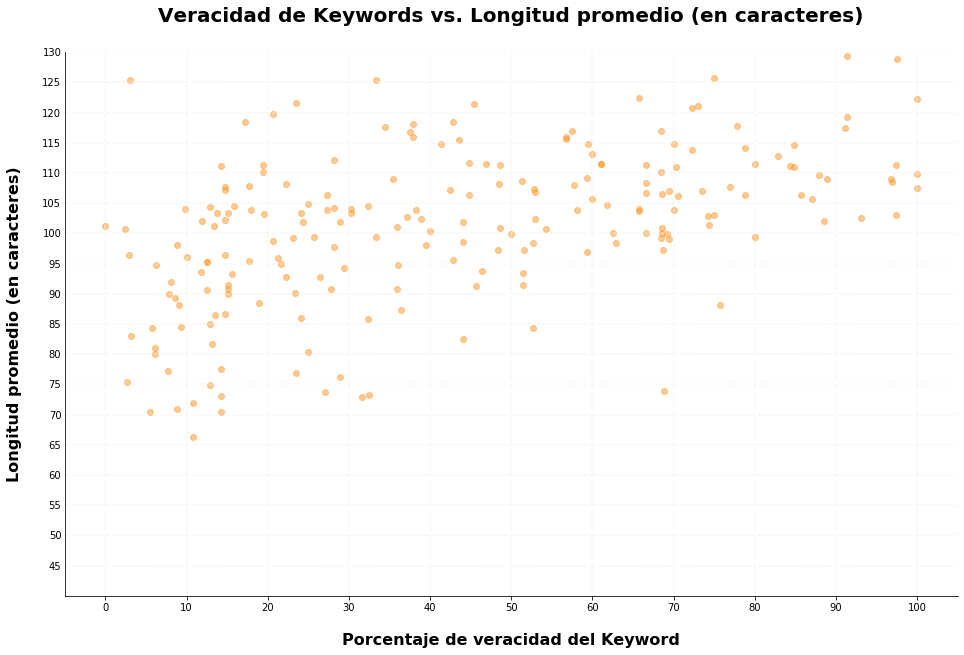

In [27]:
color_scatter = cmap(np.linspace(0.5, 0.7,1))

plt.figure(figsize=(16,10)) 
veracidad_vs_long_w = plt.subplot()

scatter = veracidad_vs_long_w.scatter(x=keywords_representables['veracity']*100,\
                                      y=keywords_representables['char_length_mean'], c=color_scatter[::-1], alpha=0.5)

plt.xticks(np.arange(0, 100+1, 10.0))
plt.yticks(np.arange(45, 135, 5.0))
plt.ylim(40, 130)
plt.xlim(-5, 105)

veracidad_vs_long_w.spines['right'].set_visible(False)
veracidad_vs_long_w.spines['top'].set_visible(False)
plt.tick_params(axis='y', length=0)

lineas_x = veracidad_vs_long_w.get_xticks()
for i in lineas_x:
      veracidad_vs_long_w.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
lineas_y = veracidad_vs_long_w.get_yticks()
for i in lineas_y:
      veracidad_vs_long_w.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
veracidad_vs_long_w.set_xlabel("Porcentaje de veracidad del Keyword", labelpad=20, weight='bold', size=16)
veracidad_vs_long_w.set_ylabel("Longitud promedio (en caracteres)", labelpad=20, weight='bold', size=16)

plt.title("Veracidad de Keywords vs. Longitud promedio (en caracteres)", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Veracidad de Keywords vs. Longitud promedio (en palabras)')

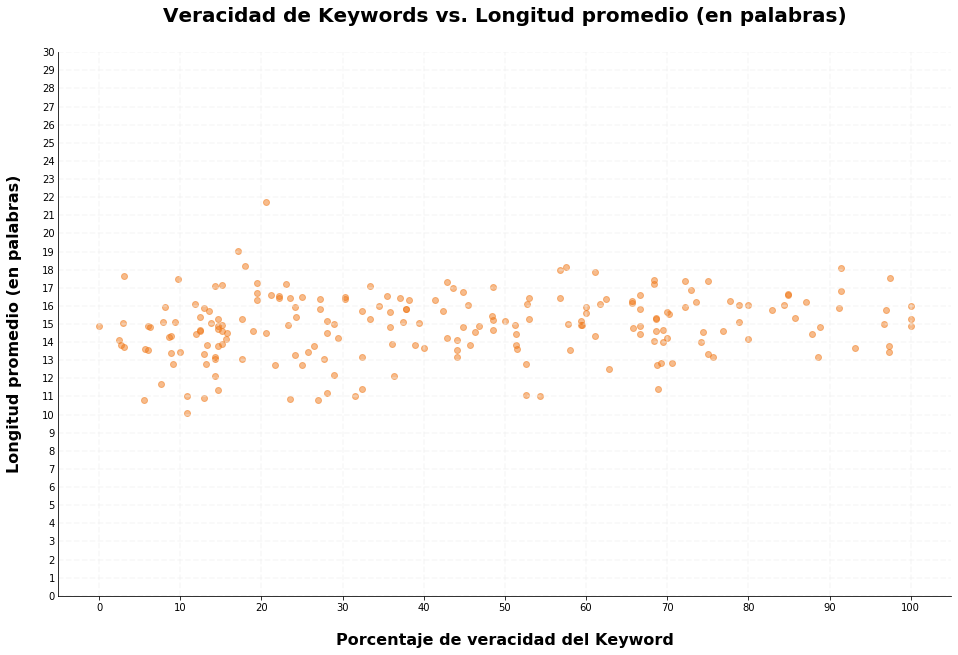

In [28]:
color_scatter = cmap(np.linspace(0.6, 0.7,1))

plt.figure(figsize=(16,10)) 
veracidad_vs_long_w = plt.subplot()

scatter = veracidad_vs_long_w.scatter(x=keywords_representables['veracity']*100,\
                                      y=keywords_representables['word_length_mean'], c=color_scatter[::-1], alpha=0.5)

plt.xticks(np.arange(0, 100+1, 10.0))
plt.yticks(np.arange(0, 30+1, 1.0))
plt.ylim(0, 30)
plt.xlim(-5, 105)

veracidad_vs_long_w.spines['right'].set_visible(False)
veracidad_vs_long_w.spines['top'].set_visible(False)
plt.tick_params(axis='y', length=0)

lineas_x = veracidad_vs_long_w.get_xticks()
for i in lineas_x:
      veracidad_vs_long_w.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
lineas_y = veracidad_vs_long_w.get_yticks()
for i in lineas_y:
      veracidad_vs_long_w.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
veracidad_vs_long_w.set_xlabel("Porcentaje de veracidad del Keyword", labelpad=20, weight='bold', size=16)
veracidad_vs_long_w.set_ylabel("Longitud promedio (en palabras)", labelpad=20, weight='bold', size=16)

plt.title("Veracidad de Keywords vs. Longitud promedio (en palabras)", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Longitud promedio en palabras vs. Longitud promedio en caracteres\n(agrupados según Keyword)')

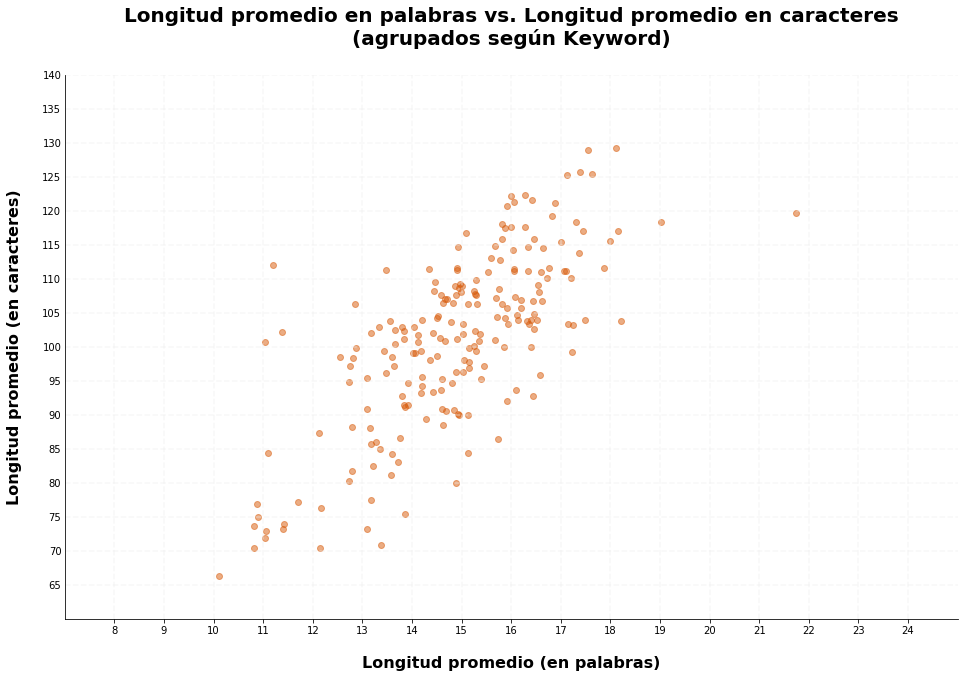

In [29]:
color_scatter = cmap(np.linspace(0.7, 0.8,1))

plt.figure(figsize=(16,10)) 
veracidad_vs_long_w = plt.subplot()

scatter = veracidad_vs_long_w.scatter(y=keywords_representables['char_length_mean'],\
                                      x=keywords_representables['word_length_mean'], c=color_scatter[::-1], alpha=0.5)

plt.xticks(np.arange(8, 24+1, 1.0))
plt.yticks(np.arange(65, 140+1, 5.0))
plt.ylim(60, 140)
plt.xlim(7, 25)

veracidad_vs_long_w.spines['right'].set_visible(False)
veracidad_vs_long_w.spines['top'].set_visible(False)
plt.tick_params(axis='y', length=0)

lineas_x = veracidad_vs_long_w.get_xticks()
for i in lineas_x:
      veracidad_vs_long_w.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
lineas_y = veracidad_vs_long_w.get_yticks()
for i in lineas_y:
      veracidad_vs_long_w.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
veracidad_vs_long_w.set_xlabel("Longitud promedio (en palabras)", labelpad=20, weight='bold', size=16)
veracidad_vs_long_w.set_ylabel("Longitud promedio (en caracteres)", labelpad=20, weight='bold', size=16)

plt.title("Longitud promedio en palabras vs. Longitud promedio en caracteres\n(agrupados según Keyword)", weight='bold', size=20, pad=30)

In [30]:
aaa = tweets_por_keyword.sort_values(by='count', ascending=False)
aaa.head(10)

,about_disaster_true,about_disaster_false,count,veracity,char_length_mean,word_length_mean
keyword,,,,,,
none_keyword,42.0,19.0,61,0.688525,73.918033,11.409836
fatalities,26.0,19.0,45,0.577778,108.088889,14.977778
deluge,6.0,36.0,42,0.142857,111.166667,17.095238
armageddon,5.0,37.0,42,0.119048,102.023810,14.428571
body_bags,1.0,40.0,41,0.024390,100.780488,14.121951
damage,19.0,22.0,41,0.463415,93.731707,14.585366
harm,4.0,37.0,41,0.097561,103.975610,17.487805
sinking,8.0,33.0,41,0.195122,103.219512,17.243902
evacuate,25.0,15.0,40,0.625000,100.050000,16.400000


In [88]:
color_wordcloud = cmap(np.linspace(0.2, .87,20))
colores_rgb = ()
for i in color_wordcloud:
    #convierto rgba en rgb
    aux = list(i)
    del aux[3]
    aux = (int(x * 255) for x in aux)
    aux =tuple(aux)
    colores_rgb = colores_rgb + (aux,)
    
print(colores_rgb)

((254, 235, 162), (254, 229, 150), (254, 221, 134), (254, 213, 115), (254, 204, 96), (254, 195, 78), (254, 183, 67), (254, 171, 57), (254, 159, 46), (251, 147, 38), (246, 135, 32), (241, 124, 26), (236, 112, 20), (227, 102, 15), (218, 92, 10), (209, 81, 4), (198, 73, 2), (183, 66, 2), (169, 59, 3), (154, 52, 3))


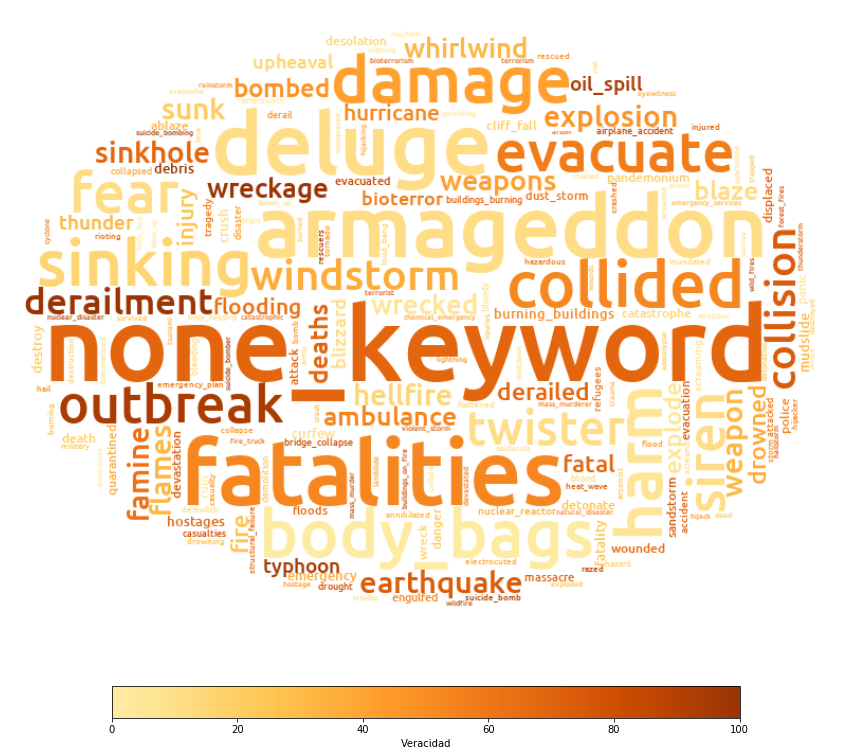

In [124]:
plt.figure(figsize=(15,15)) 

texto = tweets_final['keyword'].to_string().replace("%20", "_")

mask = np.array(Image.open("../TP1-Organizacion-de-Datos/imagenes/ovalo.png"))

keys = {}
keywords = tweets_por_keyword.index.get_values().tolist()
veracidades = tweets_por_keyword['veracity'].tolist()

for i in range(len(keywords)):
    keys[keywords[i]] = veracidades[i]

#cosa de mandinga, no tocar    
def my_tf_color_func(dictionary):
  def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
    return colores_rgb[int(dictionary[word]*19)]
  return my_tf_color_func_inner
    
    
wordcloud = WordCloud(font_path='../fonts/truetype/ubuntu/Ubuntu-M.ttf',collocations=False, colormap=cmap, \
                      relative_scaling=0.5, background_color='white', width=800, height=200, \
                      color_func=my_tf_color_func(keys), normalize_plurals=False, mask=mask, prefer_horizontal=0.5).generate(texto)

topes = mpl.colors.Normalize(vmin=0, vmax=100)
cmap_wordcloud = ListedColormap(cmap(np.linspace(0.2, 0.87, 256)))

plt.imshow(wordcloud, interpolation='bilinear')
plt.colorbar(cm.ScalarMappable(norm=topes, cmap=cmap_wordcloud), label='Veracidad', \
             orientation='horizontal', shrink=0.75, pad=0.05)
plt.axis("off")
plt.show()

# Relación de veracidad y longitud con palabras/caracteres específicos

#### Se buscará estudiar si existe una relación de los tweets que contienen nombres de ciudades/países, los que comienzan con mayúsculas, incluyen URLs o poseen los caracteres '#', '@', '¿?', '¡!', con la veracidad y longitud de los mismos. 

#### Se comienza leyendo el archivo de locaciones que se buscarán en los tweets.

In [ ]:
ciudades = pd.read_csv('../TP1-Organizacion-de-Datos/csv/worldcities.csv')

In [ ]:
ciudades.head()

In [ ]:
ciudad = ciudades['city_ascii'].str.lower()
paises = ciudades['country'].drop_duplicates().str.lower()
#iso2 = ciudades['iso2'].drop_duplicates().str.lower()
#iso3 = ciudades['iso3'].drop_duplicates().str.lower()
locaciones = pd.concat([ciudad, paises])
locaciones.count()

#### Se crea el dataframe a utilizar para el estudio

In [ ]:
elementos = ['#', '@', '¡,!', '¿,?', 'URL (http)', 'Locación', 'Comienza con mayúscula']
caracteristicas = pd.DataFrame(index=elementos)
caracteristicas

In [ ]:
caracteristicas['ocurrencias'] = 0
caracteristicas['ocurrencias_verd'] = 0
caracteristicas['long_prom_char'] = 0
caracteristicas['long_prom_char_v'] = 0
caracteristicas['long_prom_char_f'] = 0
caracteristicas['long_prom_word'] = 0
caracteristicas['long_prom_word_v'] = 0
caracteristicas['long_prom_word_f'] = 0
caracteristicas.head()

#### Además, se crea un dataframe auxiliar para realizar las búsquedas

In [ ]:
auxiliar = tweets_final.iloc[:,3:7]
auxiliar.head()

#### Se definen las funciones buscadores de caracteres y ciudades.

In [ ]:
def valores_calculados(auxiliar):
    
    encontrados = auxiliar['contains_element'].sum()
    verdaderos = auxiliar[auxiliar['about_disaster']==True]['contains_element'].sum()
    long_char = auxiliar[auxiliar['contains_element']==True]['char_length'].mean()
    long_char_v = auxiliar[(auxiliar['contains_element']==True) & (auxiliar['about_disaster']==True)]['char_length'].mean()
    long_char_f = auxiliar[(auxiliar['contains_element']==True) & (auxiliar['about_disaster']==False)]['char_length'].mean()
    long_word = longitud = auxiliar[auxiliar['contains_element']==True]['word_length'].mean()
    long_word_v = auxiliar[(auxiliar['contains_element']==True) & (auxiliar['about_disaster']==True)]['word_length'].mean()
    long_word_f = auxiliar[(auxiliar['contains_element']==True) & (auxiliar['about_disaster']==False)]['word_length'].mean()
    
    return encontrados, verdaderos, long_char, long_char_v, long_char_f, long_word, long_word_v, long_word_f

In [ ]:
def buscar_caracteres(caracter1, caracter2=""):
    if caracter2 == "":
        auxiliar['contains_element'] = auxiliar['text'].str.contains(caracter1) 
    else: 
        auxiliar['contains_element'] = auxiliar['text'].str.contains('|'.join([caracter1, caracter2]))    
    return valores_calculados(auxiliar)

In [ ]:
def buscar_inicial():
    iniciales = auxiliar['text'].str.slice(stop=1)
    auxiliar['contains_element'] = iniciales.str.isupper()
    return valores_calculados(auxiliar)    

In [ ]:
# ejecutar luego de buscar_inicial, se puede arreglar pero son las 5am
def buscar_locaciones():
    auxiliar['contains_element'] = False
    auxiliar['text'] = auxiliar['text'].str.lower()
    for locacion in locaciones:
        auxiliar.loc[auxiliar['contains_element']==False, ['contains_element']] = (auxiliar.loc[auxiliar['contains_element']==False]['text']).str.contains(locacion, regex=False)
                
    return valores_calculados(auxiliar)

####  Se completa el dataframe

In [ ]:
caracteristicas.loc['#',:] = buscar_caracteres('#')
caracteristicas.loc['@',:] =  buscar_caracteres('@')
caracteristicas.loc['¿,?',:] =  buscar_caracteres('\?', '¿')
caracteristicas.loc['¡,!',:] =  buscar_caracteres('!', '¡')
caracteristicas.loc['URL (http)',:] = buscar_caracteres('http')
caracteristicas.head()

In [ ]:
caracteristicas.loc['Comienza con mayúscula',:] = buscar_inicial()
caracteristicas

In [ ]:
caracteristicas.loc['Locación',:] = buscar_locaciones()
caracteristicas

In [ ]:
caracteristicas['ocurrencias_falsas'] = caracteristicas['ocurrencias']-caracteristicas['ocurrencias_verd']

In [ ]:
caracteristicas['veracidad'] = caracteristicas['ocurrencias_verd']/caracteristicas['ocurrencias']
caracteristicas

#### Se reordena el dataframe

In [ ]:
caracteristicas = caracteristicas[['ocurrencias_verd', 'ocurrencias_falsas', 'ocurrencias', 'veracidad', 'long_prom_char', 'long_prom_char_v', 'long_prom_char_f', 'long_prom_word', 'long_prom_word_v', 'long_prom_word_f']]
caracteristicas

#### Se procede a graficar las relaciones deseadas

In [ ]:
plt.figure(figsize=(14,10))
ocurrencias = plt.subplot()

x = caracteristicas.index.to_list()
ocurr_verd = caracteristicas['ocurrencias_verd']
ocurr_falsas = caracteristicas['ocurrencias_falsas']

ocurrencias.bar(x=x, height=ocurr_verd, color=colores[14], label = 'Ocurrencias verdaderas')
ocurrencias.bar(x=x, height=ocurr_falsas, bottom=ocurr_verd, color= colores[2], label = 'Ocurrencias falsas')

saltos_y = np.linspace(0, 7000, 15)
plt.yticks(saltos_y)
plt.xticks(fontsize = 11)

ocurrencias.spines['right'].set_visible(False)
ocurrencias.spines['top'].set_visible(False)
ocurrencias.spines['bottom'].set_visible(False)
ocurrencias.spines['left'].set_visible(False)
plt.tick_params(axis='both', length=0)

lineas = ocurrencias.get_yticks()
for i in lineas:
    ocurrencias.axhline(y=i, linestyle='--', alpha=0.5, color='#eeeeee')

for x, y in enumerate(ocurr_verd):
    ocurrencias.text(x-0.4, y + .35, str(y), color=colores[14], fontweight='bold', fontsize=12)

for x, y in enumerate(ocurr_falsas+ocurr_verd):
    ocurrencias.text(x-0.4, y +.35, str(y), color=colores[2], fontweight='bold', fontsize=12)    

ocurrencias.set_xlabel("Característica", labelpad=20, weight='bold', size=16)
ocurrencias.set_ylabel("Ocurrencias", labelpad=20, weight='bold', size=16)
plt.legend(frameon=False, loc='best', fontsize=10)
plt.title("Ocurrencias según características que aparecen en los tweets", weight='bold', size=18)

plt.show()

In [ ]:
plt.figure(figsize=(16,10)) 
long = plt.subplot()

long.plot(caracteristicas.index.values.tolist(), caracteristicas['long_prom_char'],\
                lw=2, color=colores[19], alpha=1, label='Longitud promedio de tweets totales')

long.plot(caracteristicas.index.values.tolist(), caracteristicas['long_prom_char_v'],\
                lw=2, color=colores[7], alpha=1, label='Longitud promedio de tweet veraces')

long.plot(caracteristicas.index.values.tolist(), caracteristicas['long_prom_char_f'],\
                lw=2, color=colores[0], alpha=1, label='Longitud promedio de tweet no veraces')

plt.yticks(np.arange(0, 160, 10.0))

long.spines['right'].set_visible(False)
long.spines['top'].set_visible(False)
plt.tick_params(axis='y', length=0)

lineas_x = long.get_xticks()
for i in lineas_x:
      long.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
lineas_y = long.get_yticks()
for i in lineas_y:
      long.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
        
        
long.set_xlabel("Características", labelpad=20, weight='bold', size=16)
long.set_ylabel("Longitud promedio (en caracteres)", labelpad=20, weight='bold', size=16)

long.legend(frameon=False, loc='best', ncol=3)

plt.title("Longitud promedio de los tweets según característica que poseen", weight='bold', size=20, pad=30)

In [ ]:
plt.figure(figsize=(16,10)) 
long = plt.subplot()

long.plot(caracteristicas.index.values.tolist(), caracteristicas['long_prom_word'],\
                lw=2, color=colores[19], alpha=1, label='Longitud promedio de tweets totales')

long.plot(caracteristicas.index.values.tolist(), caracteristicas['long_prom_word_v'],\
                lw=2, color=colores[7], alpha=1, label='Longitud promedio de tweet veraces')

long.plot(caracteristicas.index.values.tolist(), caracteristicas['long_prom_word_f'],\
                lw=2, color=colores[0], alpha=1, label='Longitud promedio de tweet no veraces')

plt.yticks(np.arange(14, 17, 0.1))

long.spines['right'].set_visible(False)
long.spines['top'].set_visible(False)
plt.tick_params(axis='y', length=0)

lineas_x = long.get_xticks()
for i in lineas_x:
      long.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
lineas_y = long.get_yticks()
for i in lineas_y:
      long.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
        
        
long.set_xlabel("Características", labelpad=20, weight='bold', size=16)
long.set_ylabel("Longitud promedio (en palabras)", labelpad=20, weight='bold', size=16)

long.legend(frameon=False, loc='best', ncol=3)

plt.title("Longitud promedio de los tweets según característica que poseen", weight='bold', size=20, pad=30)